In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv("test.csv")

from sklearn.model_selection import train_test_split


In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


前処理について

以下の観点をすべて含めて記述しましょう。

前処理とは何か
なぜ前処理を行う必要があるのか
前処理は具体的に何を行うか(3つ以上記述せよ)
前述した具体的な前処理について、その前処理を行うと何を得ることができるか(記述したそれぞれの前処理例について記述せよ)


前処理とは、データ分析を行う前に、データ分析に適したデータにするために、実施する前作業をいう。前処理は、データの形式が取得するシステム等によりバラバラであるため必要になる。具体的な処理としては、欠損値への対応、外れ値への対応、データ操作が挙げられる。欠損値への対応を行うと、欠損値を埋めることで、naの数値がないものが入手できる。また、外れ値への対応を行うと、そのデータでイレギュラーな値を外した、通常の範囲内でのデータを作成することができる。最後にデータ操作とは、標準化や、正規化といった処理を指し、これを行うことで、標準化であれッば、データのスケールに依存しないデータを入手できるメリットがある（正則化は省略）。
これらはいずれも、決定係数を向上するための方法として整理される


2/前処理について記述せよ

⇒具体的にそのデータを見るときに、まずはデータを可視化することで、データに外れ値はないか、各説明変数のスケールに大きくずれはないか、また、前段階で欠損値はないかを確認することが必要になる。

In [4]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna("N")
    df.Cabin = df.Cabin.apply(lambda x:x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1,0,8,15,31,1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x:x.split(' ')[0])
    df["NamePrefix"] = df.Name.apply(lambda x:x.split(" ")[1])
    return df

def drop_features(df):
    return df.drop(["Ticket","Name","Embarked"],axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df


data_train = transform_features(data_train)
data_test = transform_features(data_test)

data_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.
5,6,0,3,male,Unknown,0,0,2_quartile,N,"Moran,",Mr.
6,7,0,1,male,Adult,0,0,4_quartile,E,"McCarthy,",Mr.
7,8,0,3,male,Baby,3,1,3_quartile,N,"Palsson,",Master.
8,9,1,3,female,Young Adult,0,2,2_quartile,N,"Johnson,",Mrs.
9,10,1,2,female,Teenager,1,0,3_quartile,N,"Nasser,",Mrs.


In [5]:
from sklearn import preprocessing

def encoding_features(df_train, df_test):
    features = ["Fare", "Cabin", "Age", "Sex", "Lname", "NamePrefix"]
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encoding_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


前処理の内容について記述せよ

simplify_ages：Ageの列について、naを-0.5で埋めつつ、binsの間隔でデータをgroup_namesでラベルつけ。最終的に、数値で表現するための処理


simplify_cabins：Cabinの列について、naをNで埋めつつ、最初の１文字目を取得。最終的に、数値で表現するための処理

simplify_fares：Fareの列について、naを-0.5で埋めつつ、binsの間隔でデータをgroup_namesでラベルつけ。最終的に、数値で表現するための処理

format_name：名前と苗字を分解し、苗字はMrかMs等になるように分解。最終的に、数値で表現するための処理

drop_features：分析に使用しない、"Ticket","Name","Embarked"を落とす。特徴量を減らすことで、認識精度を上げることが目的の処理

encode_features：これまでに実施したカテゴリー分けした列に対して、数値変換する。分析を行うために実施。

モデル選択について記述せよ

今回は、生存予測（分類）を行いますが、この分類について使用できそうな手法を4つ以上しらべて記述せよ。
その手法の概要をそれぞれ記述せよ
その手法の長所/短所をそれぞれ3つずつ、記述したすべての手法において記述せよ

①：ロジスティック回帰：結果を０から１に収まるように、数学的に改良を行った線形回帰の手法

長所：出力が０から１に抑えられており、スケールが統一される。出力が確率として把握できる。簡単な割には、識別精度が高い

短所：高い精度が見込めない。線形分離できない場合には、特に精度が出ない。カテゴリー変数をダミー変数にする必要がある

②：ディシジョンツリー：トーナメント表のような木構造で考えられる選択肢を分岐として処理していくこと

長所：結果をグラフィカルに表現でき、解釈も容易であること。説明変数と被説明変数が非線形構造であっても、精度を高く保てる。前処理を必要としない

短所：過学習を起こす。データによって、一番最初の分岐がうまく分かれないことがある。判別結果の分散が大きく、データが少し変わっただけで、構成される気の構造や判別ルールが大きく変わってしまう

③ナイーブベイズ：ベイズの定理を利用し、事前分布にたいしてインプットデータを通すことで、結果を得るための手法

長所：高速で処理できる。一定の精度が出る。比較的サンプル数が少なくても学習が可能

短所：各変数間が独立という仮定を置いているため、現実問題に即していないこと。高速で一定の精度は出るものの、高い精度は見込めないこと。事前分布の決定に一定の恣意性が介入することがある。

④サポートベクターマシーン：マージンを最小化するような線や平面を最適化問題を適用して検索する方法

長所：データの特徴の次元が大きくなっても識別精度が良い。最適化すべきパラメータが少ない。パラメータの算定が用意

短所：学習データが増えると、計算量が膨大になる。基本的には2クラス分類向けである。超平面の検索に際して、数学的に高度なテクニックを使うため、直感的な理解が難しい

モデル選択の基準

下記の参考資料を元に、どのような視点からモデルを選択すれば良いか、最低でも3つ以上の視点を記述すること(他の参考資料でも構わない、その場合参考資料を明記すること)

https://docs.microsoft.com/ja-jp/azure/machine-learning/machine-learning-algorithm-choice

https://datumstudio.jp/blog/機械学習におけるモデルの選択方法について

- 精度：一般的には高い方が良い(95%程度)とされているものの、その取り組みたい問題によってどの程度の精度が必要かを検討する
- トレーニング時間：選択するモデルのパラメータの数に依存すると考えられるが、どの程度の時間で学習が完了するかは重要と考える。複雑なモデルにすればするほど、計算時間＝学習時間がかかる傾向にあり、あまり時間がかかりすぎると、パラメータのチューニングをクイックにできないといった問題が生じ、適切なモデル構築ができない。
- 線形性：対象となるデータが線形なのか、非線形なのかによって線形にあったモデル、非線形にあったモデルの選択を行う。

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

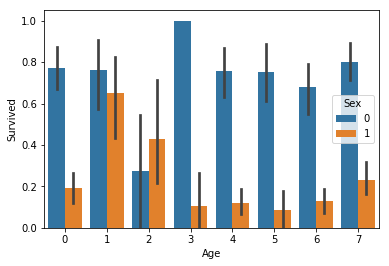

In [7]:
sns.barplot("Age", "Survived", hue="Sex",data=data_train)

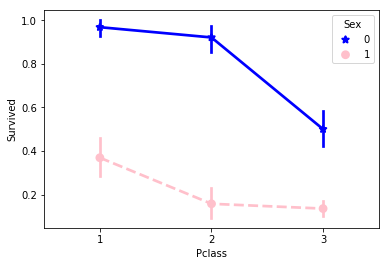

In [8]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
             palette={"blue","pink"},
             markers=["*","o"],linestyles=["-","--"])

データ可視化の結果について考察せよ

以下の観点をすべて含めて記述しましょう。

- 上記の２つの可視化から分かったことについて考察せよ。
- 上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか

- 女性の方が、生存率が高い。Pclassが高い(１に近い)方が、生存率が高い
- ２クラス問題を重回帰で、非線形で行うことができるモデルを選択する。

In [9]:
from sklearn.model_selection import train_test_split
X = data_train.drop(["Survived","PassengerId"],axis=1)
y = data_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

C:\Users\makoto.mizuguchi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


ランダムフォレストについて記述せよ

以下の観点をすべて含めて記述しましょう。

決定木とはどのような手法か
ランダムフォレストとはどのような手法か
ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください。
今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ

決定木とは、トーナメント表のような木構造で考えられる選択肢を分岐として処理していくこと

長所：結果をグラフィカルに表現でき、解釈も容易であること。説明変数と被説明変数が非線形構造であっても、精度を高く保てる。前処理を必要としない

短所：過学習を起こす。データによって、一番最初の分岐がうまく分かれないことがある。判別結果の分散が大きく、データが少し変わっただけで、構成される気の構造や判別ルールが大きく変わってしまう

ランダムフォレストは、決定木をたくさん重ね、決定木のデメリットをカバーするように設計されたアンサンブル学習の１手法。

長所：学習方法は単純であるものの、一般的な決定木より性能の良い識別ができる。非線形にも対応している。過学習を一定程度防ぐことができる

短所：あまり木を深くしすぎると過学習を起こす。パラメータによっては計算量が多くなる。SVMの方がより非線形に対応している場合もある

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
clf.score(X_test, y_test)

0.73184357541899436

ハイパーパラメータについて

ハイパーパラメーターとは何か
ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ
記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ（そのハイパーパラメーターを変化させるとどのようなことが起きるかも記述すること）

ハイパーパラメータとは、機械学習を行う際に、人間があらかじめ定めておかないといけないパラメータのこと。
- n_estimator：木の数：これを変化させると、使用する木の数が増減する
- max_features：使用する列の個数：これを変化させるとデータから何個列を使うかが変化する
- max_depth：最大の木の深さ：これを変化させると、1つずつの木の深さが変化する
- n_jobs：並列計算を行う切り替え：これを変化させると、並列計算をどの程度行うかが変化する

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
params = {'n_estimators': [4, 6, 9],'max_features': ['log2', 'sqrt','auto'],'criterion': ['entropy', 'gini'],
          'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5],'min_samples_leaf': [1,5,8]}

gs = GridSearchCV(clf, params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 6}

In [16]:
gs.score(X_test, y_test)

0.75418994413407825

In [17]:
gs_best = RandomForestClassifier(criterion='entropy',max_depth=10,max_features= 'log2',min_samples_leaf=1,min_samples_split=2,n_estimators=6)

In [18]:
gs_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

検証について記述せよ

以下の観点をすべて含めて記述しましょう。

検証は何か
なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)
主な検証方法について2つ以上記述せよ

検証は機械学習の性能を正しく評価する事を趣旨として行う、精度を確認する作業であり、モデルのチューニングのために行う必要があると言える。Accuracyだけでは、たまたま精度が良かっただけということもあるため、様々な角度からの検証方法が存在する。
- ホールドアウト法：学習データとテストデータを単純に１方法で分割する
- 交差確認法：全体をグループ分けし、テストデータの役割を変更しながら検定する方法

KFoldについて記述せよ

以下の観点をすべて含めて記述しましょう。

K-分割交差検証について説明せよ
K-分割交差検証はデータセットを何個に分割するか
データセットを分割する際、その個数はどのように考えると良いか
K-分割交差検証は何回の検証を行うか
K-分割交差検証の結果は、最終的にどのように求められるか

1個をバリデーションデータとして、k-1個を学習データとして、全体を分割して、学習と検証を行う手法である。K分割交差検定は、全体をｋ個に分割する。kはいくつにするかという点を考える際には、スタージェスの公式としてk = 1 + log(n)/log(2)を目安にするとよい。なお、この際には、k回の検証が行われており、最終的に結果としては、scoreの平均を用いて評価することが多い

In [19]:
from sklearn.model_selection import KFold
ss = KFold(n_splits=10, shuffle=True) 

In [20]:
scores= []
for train_index, test_index in ss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gs_best.fit(X_train, y_train)
    score = gs_best.score(X_test, y_test)
    scores.append(score)
scores = np.array(scores)
scores.mean()

0.82388264669163558

In [21]:
gs_best.feature_importances_

array([ 0.07378371,  0.15598476,  0.09714775,  0.07860079,  0.02852827,
        0.06631658,  0.07814895,  0.24061769,  0.18087147])

どの特徴量が重要であったかを調査する

上記より、0.2406...が重要であり、以下を参考にするとLnameとなる

In [23]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
2,3,0,7,0,0,0,7,329,16
17,2,1,6,0,0,1,7,847,19
32,3,0,6,0,0,0,7,287,16
33,2,1,3,0,0,1,7,835,19
37,3,1,4,0,0,1,7,124,19
73,3,1,7,1,0,1,7,149,19
76,3,1,6,0,0,0,7,758,19
83,1,1,7,0,0,3,7,130,19
84,2,0,5,0,0,1,7,362,16
98,2,0,7,0,1,2,7,213,20
